# Exploratory Data Analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('../Data/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [12]:
print(np.unique(data['ocean_proximity'],return_counts=True))

ocean_dict = {
    '<1H OCEAN' : 0,
    'INLAND' : 1,
    'ISLAND' : 2,
    'NEAR BAY' : 3,
    'NEAR OCEAN' : 4
}
data['ocean_proximity'] = data['ocean_proximity'].map(ocean_dict)


(array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object), array([9136, 6551,    5, 2290, 2658]))


In [13]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [14]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
null_indices = data[data['total_bedrooms'].isnull()].index
# 207 rows is very insignificant compared to the size of the dataset, so we just drop them
data = data.drop(null_indices) 
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [16]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [17]:
plt.style.use('dark_background')

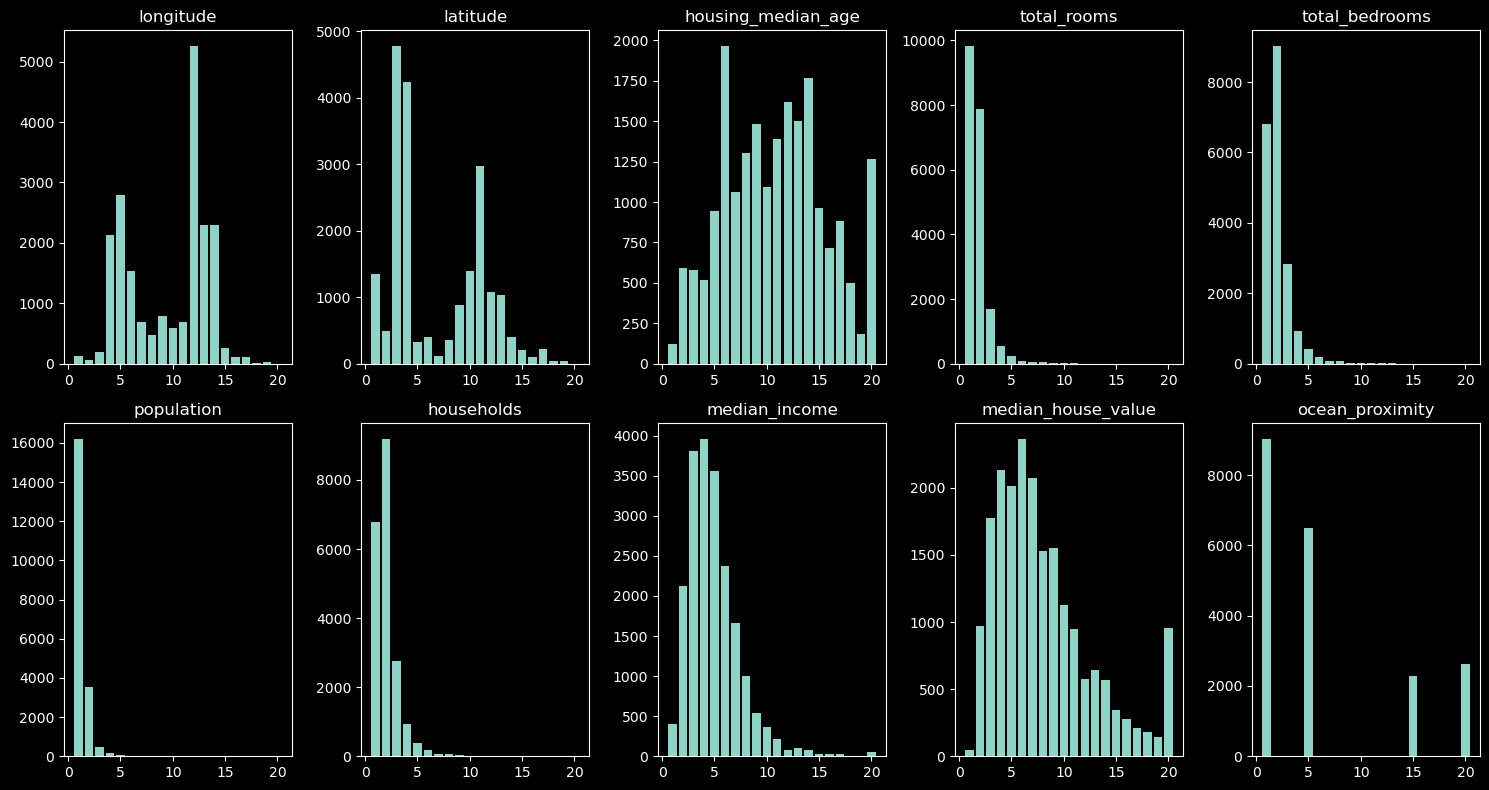

In [18]:
fig, axes = plt.subplots(2,5, figsize = (15,8))

axes = axes.flatten()

for idx, feature in enumerate(data.columns):
    bins = np.linspace(data[feature].min(), data[feature].max(), 20)
    bins, count = np.unique(np.digitize(data[feature],bins),return_counts=True)
    axes[idx].bar(bins, count)
    axes[idx].set_title(feature)
    
plt.tight_layout()
plt.show()

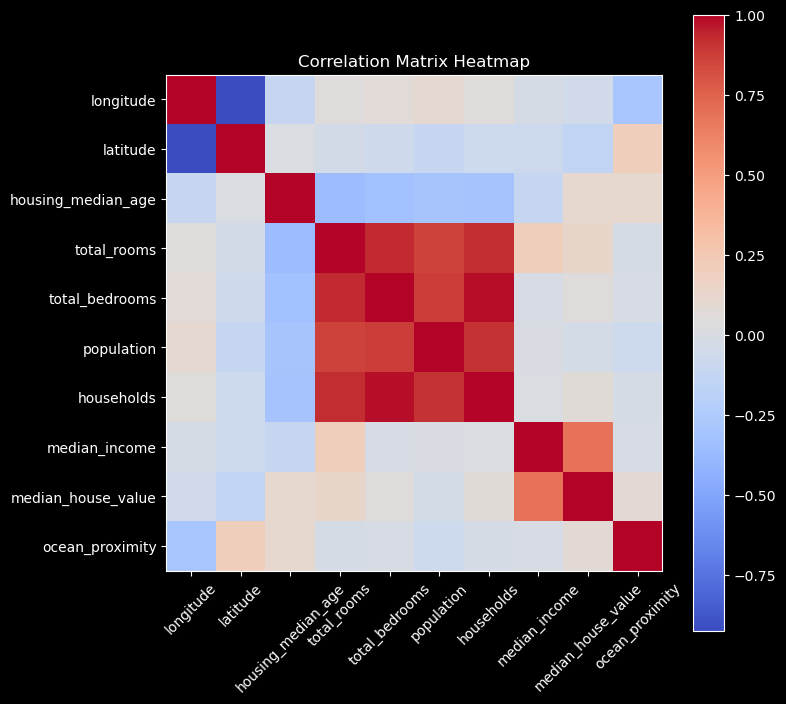

In [19]:
corr_matrix = data.corr()
plt.figure(figsize=(8,8))

plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

plt.title('Correlation Matrix Heatmap')
plt.xticks(np.arange(len(corr_matrix)), [f'{data.columns[i]}' for i in range(len(corr_matrix))],rotation=45)
plt.yticks(np.arange(len(corr_matrix)), [f'{data.columns[i]}' for i in range(len(corr_matrix))])

plt.show()


In [20]:
data.to_csv('housing_clean.csv', index = False)

In [21]:
label = 'median_house_value'
data_X = data.drop(label,axis=1)

data_X_std = (data_X - data_X.mean())/data_X.std()

cov = data_X_std.cov()
eigen_values , eigen_vectors = np.linalg.eigh(cov)
100*eigen_values/np.sum(eigen_values)

array([ 0.16478781,  0.49715277,  0.88224682,  1.63470379,  8.54037317,
       10.40121796, 11.94881873, 22.46154727, 43.46915167])

<Axes: xlabel='PC1', ylabel='PC2'>

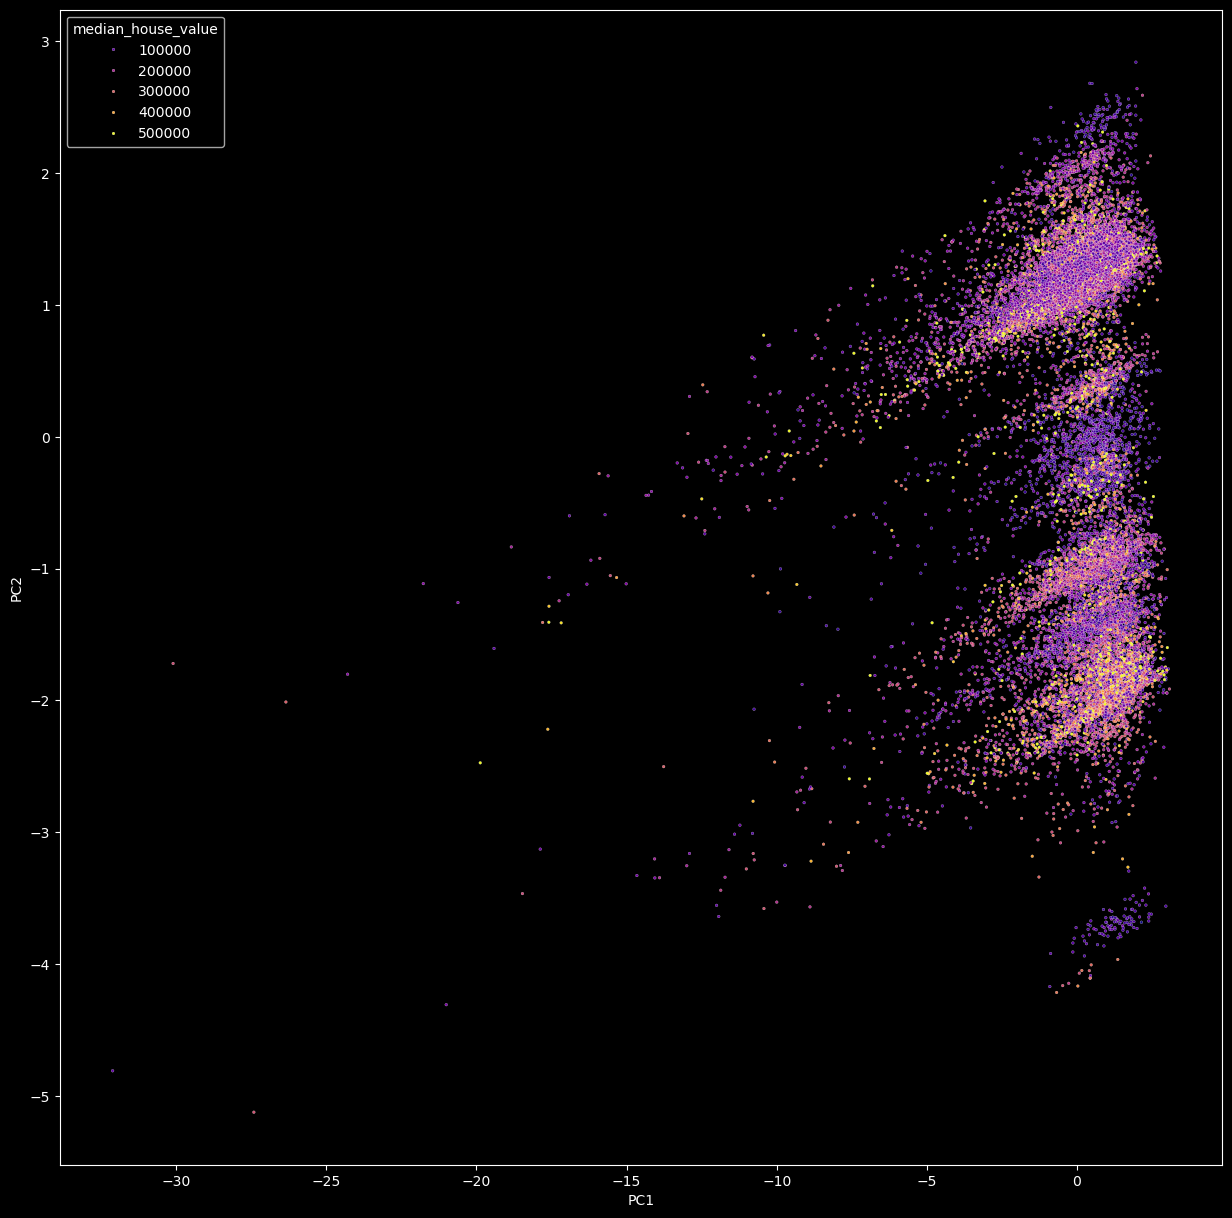

In [22]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_index]
sorted_eigen_vectors = eigen_vectors[:,sorted_index]

n_components = 2 
eigenvector_subset = sorted_eigen_vectors[:,:n_components]

data_X_pca = np.dot(eigenvector_subset.transpose(), data_X_std.transpose()).transpose()
data_X_pca = pd.DataFrame(data_X_pca , columns = ['PC1','PC2'])
data_X_pca = pd.concat([data_X_pca , data[label]] , axis = 1)

plt.figure(figsize = (15,15))
sns.scatterplot(data = data_X_pca , x = 'PC1',y = 'PC2' , hue = label , s = 4,palette = 'plasma')
